In [ ]:
# linked google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# all imports
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stopwords modification
sw = stopwords.words('english')
sw = sw + ['im', 'dont', 'ive']

# Preprocessing

In [ ]:
# csv to pandas_dataframe
data_set = pd.read_csv("/content/drive/MyDrive/CSE422 Project/suicide_detection.csv", index_col=0)
data_set.head(5)
data_set = data_set.iloc[:150, :]
print(data_set.shape)
data_set.head(5)

# checking for null values
data_set.isnull().sum()

(150, 2)


text     0
class    0
dtype: int64

In [ ]:
# pre processing
def clean_the_data(text):
    global count

    # removed symbols, punctution, links and lowercased the text 
    pattern = "[^\w^\s]|^http.*"
    clean_text = re.sub(pattern, "", text).lower()

    # corrected grammartical errors
    tb = TextBlob(clean_text)
    correct_text = tb.correct().string

    # applied word tokenization ex. ["i", "am", "ashik"]
    tokenized = nltk.word_tokenize(correct_text)
    
    # removed stop words(i, am, is, are, of, for...)
    removed_stop_words = []
    for i in tokenized:
        if i not in sw:
            removed_stop_words.append(i)

    # wordnetlemmatizer and stemmer converts each words to it's root form 
    # ex. gives --> give, giving --> give
    processed_sentence = ""
    wnl = WordNetLemmatizer()
    ps = PorterStemmer()
    for j in removed_stop_words: 
        lemmatized_word = wnl.lemmatize(j)
        processed_sentence += ps.stem(lemmatized_word) + " "
    count += 1
    print(count)
    return processed_sentence[:-1]

In [ ]:
# function call
count = 0
data_set["text"] = data_set["text"].apply(clean_the_data)

In [ ]:
# cleaned dataset
data_set.head(5)

,text,class
2,ex wife threaten suiciderec left wife good cre...,1
3,weird get affect compliment come someon know g...,0
4,final 2020 almost never hear 2020 bad year eve...,0
8,need helpjust help cri hard,1
9,losthello name adam 16 give struggl year afrai...,1


In [ ]:
# label encoding
y = data_set["class"]
encoder = LabelEncoder()
y = encoder.fit_transform(y)
data_set["class"] = y
data_set.head(10)

,text,class
2,ex wife threaten suiciderec left wife good cre...,1
3,weird get affect compliment come someon know g...,0
4,final 2020 almost never hear 2020 bad year eve...,0
8,need helpjust help cri hard,1
9,losthello name adam 16 give struggl year afrai...,1
11,honestli idea know even feel like noth nowher ...,1
12,trigger warn excus self inflict burn know cris...,1
13,end tonight anymor quit,1
16,everyon want edg make self consciou feel like ...,0
18,life 20 year oldhello 20 year old bold male ai...,1


# Train Test Spliting

In [ ]:
x = data_set.drop(["class"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 1)
(30, 1)
(120,)
(30,)


# Vectorizing Text Data

In [ ]:
# bag of words
cv = CountVectorizer()

x_train_bow = cv.fit_transform(x_train['text']).toarray()
x_test_bow = cv.transform(x_test['text']).toarray()

print(x_train_bow.shape)
print(x_test_bow.shape)
print("\nTrain Array")
print(x_train_bow)
print("\nTest Array")
print(x_test_bow)

(120, 2205)
(30, 2205)

Train Array
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]

Test Array
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Models

In [ ]:
# Model Logistic Regression by Abid Hossain Ashik(20201162)
model = LogisticRegression(solver='lbfgs')
model.fit(x_train_bow, y_train)
y_pre = model.predict(x_test_bow)
score = accuracy_score(y_pre, y_test)
print(f"Accuracy score of logistic regression is {score*100}%")

Accuracy score of logistic regression is 80.0%


In [ ]:
# pip install mglearn  

In [ ]:
# import mglearn
# mglearn.plots.plot_knn_classification(n_neighbors =3) 

In [ ]:
# KNN model by Ahmed Wasi Bin Faruque(20101352)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_bow, y_train)


y_pred = knn.predict(x_test_bow)

score = accuracy_score(y_pred, y_test)
print(f"Accuracy score of KNN is {score*100}%")

Accuracy score of KNN is 66.66666666666666%


In [ ]:
# Model Dicision Tree by Md Yasin(20201157)
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train_bow, y_train)
y_pred = model.predict(x_test_bow)
score = accuracy_score(y_test,y_pred)
print(f"Accuracy score of Decision Tree model is  {score*100}%")

Accuracy score of Decision Tree model is  86.66666666666667%


In [ ]:
# Model Random Forest by Md Yasin(20201157)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_bow,y_train)
y_pred = model.predict(x_test_bow)
score = accuracy_score(y_test,y_pred)
print(f"Accuracy score of Random Forest model is  {score*100}%")

Accuracy score of Random Forest model is  83.33333333333334%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  1],
       [ 4, 14]])

Text(95.72222222222221, 0.5, 'Truth')

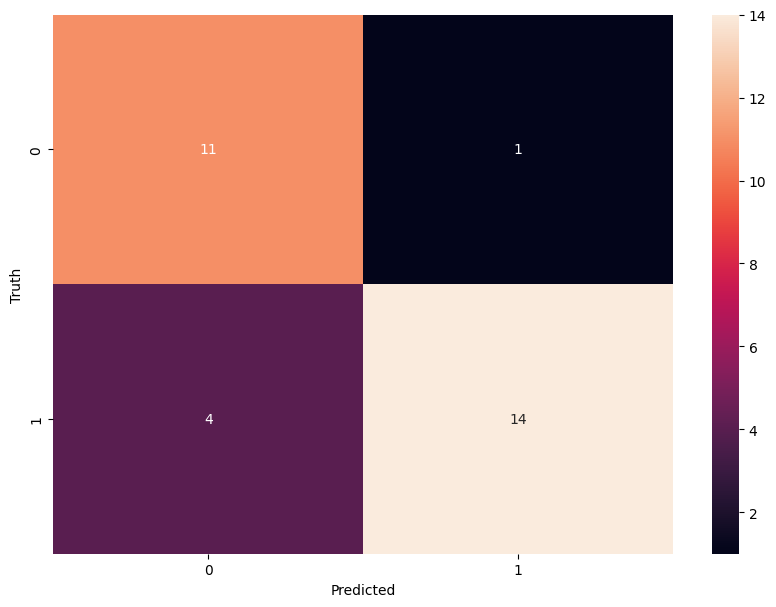

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
# Naive Byas by Zahin Zaima(20201147)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()             # I create a object gnb
gnb.fit(x_train_bow,y_train)   # i am trainning my data here and fitted that data in gnb object
score = gnb.score(x_test_bow,y_test)  
print(f"Accuracy score of GaussianNB model is  {score*100}%")

Accuracy score of GaussianNB model is  83.33333333333334%


In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train_bow,y_train)
score = NB_classifier.score(x_test_bow,y_test)
print(f"Accuracy score of MultinomialNB model is  {score*100}%")

Accuracy score of MultinomialNB model is  80.0%


In [ ]:
# Now I will utilize the NB_classifier object.
# As I train my model now I am testing my model to give test data. 
# The model give me prediction output.  

# x_test_bow= 20% text of 200= 40 values
predictions=NB_classifier.predict((x_test_bow))

In [ ]:
# predictions give me the level output which is predicted by the model

predictions

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_test   # This is the true level value of x_test_bow

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
# Confusion Matrix
# left to right diagonal give me true positive prediction number
# right to left diagonal give me false negative & false positive prediction number

from sklearn.metrics import confusion_matrix
mat= confusion_matrix(y_test,predictions)
mat


array([[ 6,  6],
       [ 0, 18]])

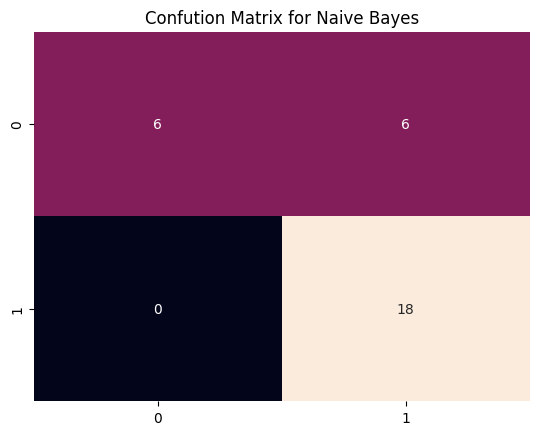

In [ ]:
sns.heatmap(mat,annot=True,fmt='d',cbar=False)
plt.title('Confution Matrix for Naive Bayes')
plt.savefig('Confution_matrix.png')
plt.show()